In [43]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
%autoreload 2
import numpy as np
from scipy.stats import unitary_group, ortho_group
from scipy.linalg import khatri_rao
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [45]:
def gauss(x, r, seed):
    np.random.seed(seed)
    return np.random.normal(size = (x, r))

def radem(x, r, seed):
    np.random.seed(seed)
    return 1 - 2 * np.random.randint(low = 0, high = 2, size = (x, r))

def big_gauss(x, r, seed):
    np.random.seed(seed)
    return np.random.normal(size = (x * x, r))

def big_radem(x, r, seed):
    np.random.seed(seed)
    return 1 - 2 * np.random.randint(low = 0, high = 2, size = (x * x, r))

def gauss_gauss(x, r, seed):
    return khatri_rao(gauss(x, r, seed=2 * seed), gauss(x, r, seed=2 * seed + 1))

def gauss_radem(x, r, seed):
    return khatri_rao(gauss(x, r, seed=2 * seed), radem(x, r, seed=2 * seed + 1))

def radem_radem(x, r, seed):
    return khatri_rao(radem(x, r, seed=2 * seed), radem(x, r, seed=2 * seed + 1))

In [133]:
base = 2
n = 80

B = np.random.normal(size = (n, n * n))
u, _, vT = np.linalg.svd(B, full_matrices=False)
sigma = np.logspace(0, -n, base=base, num=n)
A = u @ np.diag(sigma) @ vT
expected = []
variance = []
for generator, name in zip([big_gauss, big_radem, gauss_gauss, gauss_radem, radem_radem], ['big_gauss', 'big_radem', 'gauss_gauss', 'gauss_radem', 'radem_radem']):
    for r in [10, 15, 20, 27, 35, 43, 50]:
        kek = []
        for seed in range(1, 20001):
            Omega = generator(n, r, seed)
            Q, R = np.linalg.qr(A @ Omega)
            B = Q @ (Q.T @ A)
            C = u[:,:r] @ np.diag(sigma[:r]) @ vT[:r, :]
            kek.append(np.linalg.norm(A - B) / np.linalg.norm(A - C))
        kek = np.array(kek)
        expected.append((r, kek.mean(), name))
        variance.append((r, kek.var(), name))


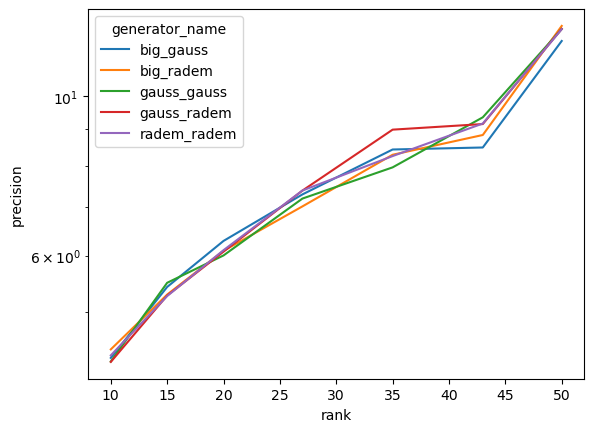

In [131]:
fig, ax = plt.subplots(1, 1)

sns.lineplot(data=pd.DataFrame(expected, columns=["rank", "precision", "generator_name"]), x='rank', y='precision', hue='generator_name', ax=ax)
ax.set_yscale('log')

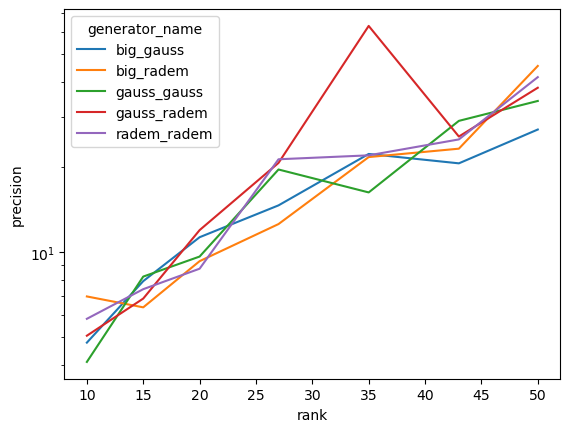

In [132]:
fig, ax = plt.subplots(1, 1)

sns.lineplot(data=pd.DataFrame(variance, columns=["rank", "precision", "generator_name"]), x='rank', y='precision', hue='generator_name', ax=ax)
ax.set_yscale('log')

In [11]:
radem_radem(30, 12, 2011)

array([[ 1, -1,  1, ...,  1, -1, -1],
       [ 1, -1, -1, ..., -1, -1, -1],
       [ 1,  1,  1, ...,  1, -1,  1],
       ...,
       [-1,  1,  1, ..., -1, -1,  1],
       [-1,  1,  1, ...,  1, -1,  1],
       [-1,  1,  1, ...,  1, -1, -1]])

In [98]:
base = 1.01
n = 60

B = np.random.normal(size = (n, n * n))
u, _, vT = np.linalg.svd(B, full_matrices=False)
sigma = np.logspace(3, 4 - n, base=base, num=n)
A = u @ np.diag(sigma) @ vT

answer = []
for generator, name in zip([big_gauss, big_radem, gauss_gauss, gauss_radem, radem_radem], ['big_gauss', 'big_radem', 'gauss_gauss', 'gauss_radem', 'radem_radem']):
    for seed in range(1, 201):
        for r in [2, 4, 6, 12, 18, 24, 30, 36]:
            Omega = generator(n, r, seed)
            # print(Omega)
            Q, R = np.linalg.qr(A @ Omega)
            B = Q @ (Q.T @ A)
            C = u[:,:r] @ np.diag(sigma[:r]) @ vT[:r, :]
            answer.append((r, (np.linalg.norm(A - B) / np.linalg.norm(A - C)) ** 2, name))
df = pd.DataFrame(answer, columns=["rank", "precision", "generator_name"])

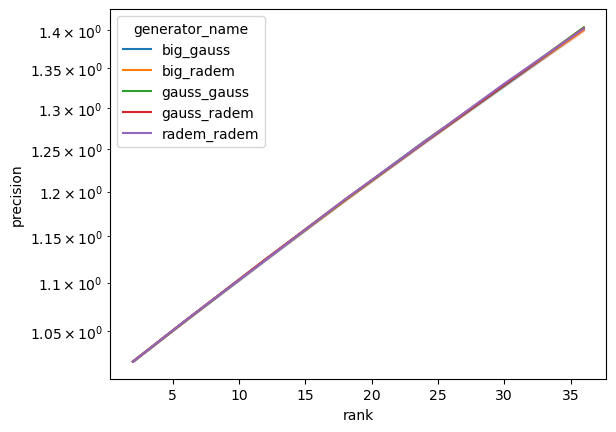

In [99]:
fig, ax = plt.subplots(1, 1)

sns.lineplot(data=df, x='rank', y='precision', hue='generator_name', ax=ax)
ax.set_yscale('log')

In [100]:
for name in ['big_gauss', 'big_radem', 'gauss_gauss', 'gauss_radem', 'radem_radem']:
    for r in [2, 4, 6, 12, 18, 24, 30, 36]:
        arr = np.array(df[df['generator_name'] == name][df['rank'] == r]['precision'])
        print(name, r, np.var(arr))

big_gauss 2 2.883128713936232e-06
big_gauss 4 5.054027068489575e-06
big_gauss 6 1.053876740357058e-05
big_gauss 12 2.1157153546465555e-05
big_gauss 18 4.086277880306709e-05
big_gauss 24 7.703127932871673e-05
big_gauss 30 0.00011092267712630421
big_gauss 36 0.00020922855181527804
big_radem 2 2.9244264546387263e-06
big_radem 4 5.220566094724305e-06
big_radem 6 8.617885362428691e-06
big_radem 12 1.7851752946381716e-05
big_radem 18 4.2064728096919076e-05
big_radem 24 5.782778011311175e-05
big_radem 30 0.0001278712242617139
big_radem 36 0.00020707382018983166
gauss_gauss 2 3.1135850810432204e-06
gauss_gauss 4 5.3717556914612106e-06
gauss_gauss 6 8.483792840316852e-06
gauss_gauss 12 2.4709576456712077e-05
gauss_gauss 18 4.104941790625235e-05
gauss_gauss 24 7.666812354245756e-05
gauss_gauss 30 0.00011349731300305238
gauss_gauss 36 0.0002189251098543605
gauss_radem 2 2.849420584775144e-06
gauss_radem 4 4.588072255583299e-06
gauss_radem 6 7.71901239670607e-06
gauss_radem 12 1.9647808302619038e-

/tmp/ipykernel_101616/2428251311.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  arr = np.array(df[df['generator_name'] == name][df['rank'] == r]['precision'])
